# Machine Learning

## What libraries should I import?

```pip install hmmlearn```

```pip install umap-learn```


In [1]:
from hmmlearn import hmm
import umap
from sklearn.mixture import GaussianMixture
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Recap
Dummy data for the following exercises is provided [here](https://ruhr-uni-bochum.sciebo.de/s/Svwxncw01Ir9uxw).

In [3]:
file = '/Users/Downloads/pose-3d.csv'
data = pd.read_csv(file, header=0)
coords = data.loc[:,~data.columns.str.contains('score|error|ncams|fnum|center|M_')]

## Helper Functions

In [4]:
def plot_prediction(data, predictions):
    """
    This function will plot the time series data and mark the transitions between predicted classes.
    
    """
    colors = {"0": "black", "1":"dimgray", "2":"darkgray", "3":"white", "4":"bisque", "5":"tan", "6":"orange", "7":"salmon", "8":"gold", "9":"rosybrown", "10":"beige", "11":"thistle", "12":"peachpuff", "13":"khaki", "14":"skyblue", "15":"lightblue", "16":"lightsteelblue", "17":"lavender", "18":"mediumaquamarine", "19":"cadetblue"}
    n = max(predictions)+1
    name =[x for x in globals() if globals()[x] is data][0]
    yloc = max(np.max(data))-(max(np.max(data)) - min(np.min(data)))/8
    locy = yloc - (max(np.max(data)) - min(np.min(data)))/8
    with plt.xkcd():
        fig = plt.figure()
        ax = plt.axes()
        ax.plot(data)
        start_pred = 0
        for i in range(len(predictions)):
            if i == len(predictions)-1:
                end_pred = i+1
                ax.axvspan(start_pred,end_pred, facecolor=colors["%d" %predictions[i]], alpha = 0.5)
                loc = start_pred + (end_pred - start_pred)/2
                ax.annotate('%d'%predictions[i], xy=(loc, locy), xytext=(loc+10, yloc),
                arrowprops=dict(arrowstyle="->", facecolor='black'))
            elif predictions[i] == predictions[i+1]:
                pass
            else:
                end_pred = i
                ax.axvspan(start_pred,end_pred, facecolor=colors["%d" %predictions[i]], alpha = 0.5)
                loc = start_pred + (end_pred - start_pred)/2
                ax.annotate('%d'%predictions[i], xy=(loc, locy), xytext=(loc+10, yloc),
                arrowprops=dict(arrowstyle="->", facecolor='black'))
                start_pred = end_pred
            
        plt.xlabel("Time [frames]")
        plt.ylabel("Feature value from %s data" %name)
        plt.title('Model predictions with N = %d Components' %n)
        plt.show()
    return

## Time segmentation with Hidden Markov Models

In [5]:
# Now we can train a Hidden markov Model with our coordinate data
model1 = hmm.GaussianHMM(n_components = 9, covariance_type="full")
model1.fit(coords)

GaussianHMM(covariance_type='full', n_components=9)

In [6]:
hmm_pred = model1.predict(coords)

In [7]:
transition1 = model1.transmat_
transition1

array([[0.97142857, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02857143, 0.        , 0.        ],
       [0.        , 0.98888889, 0.        , 0.        , 0.        ,
        0.01111111, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.97619048, 0.        , 0.        ,
        0.        , 0.        , 0.02380952, 0.        ],
       [0.01639344, 0.01639344, 0.        , 0.93442623, 0.        ,
        0.01639344, 0.        , 0.        , 0.01639344],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01234568, 0.01234568,
        0.97530864, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0212766 , 0.        ,
        0.        , 0.9787234 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.09090909, 0.        ,
        0.        , 0.        , 0.90909091, 0.        ],


In [8]:
means1 = model1.means_
means1

array([[ 2.86105481e+01, -9.97064635e-01, -3.72893831e+00,
         5.38577272e+01, -1.77160941e+00,  9.07570884e-01,
        -8.94348898e+00,  7.20725611e-02, -1.08438966e+01,
        -3.33727005e+01,  1.13417757e+00, -1.67857663e+01,
         2.57558317e+01, -1.59806285e+00,  2.46741697e+00,
         4.14117171e+01, -1.69383365e+00,  1.20160560e+01,
         5.82540459e+01, -1.75934681e+00,  1.19606985e+01,
        -7.07790769e+00, -5.45023441e-01, -1.39373751e+00,
        -2.84196689e+01,  2.81382935e-01, -8.77925716e-01,
        -4.34987246e+01,  1.53591850e+00, -9.21875757e+00,
         8.24005117e+01, -3.70814641e-01, -1.34080202e+01,
        -6.13059141e+01,  4.56141960e+00, -4.66118904e+01,
         8.92283286e+00, -1.14721464e+00, -4.55744927e+00,
         1.66562770e+01, -1.78964473e+00, -4.73304780e+01,
         3.25280713e+01, -1.77709995e+00, -4.20651672e+01,
         4.37832185e-01, -5.36582968e-01, -5.07692843e+01,
         2.17006484e+01, -1.52746198e+00, -7.10130569e+0

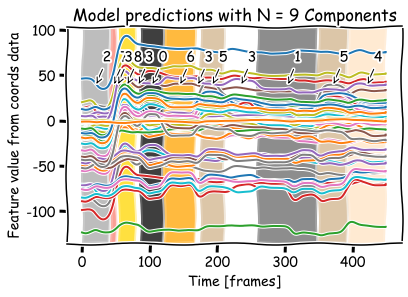

In [9]:
plot_prediction(coords, hmm_pred)

## Gaussian Mixture Model

In [10]:
gmm_pred = GaussianMixture(n_components=9, covariance_type='full').fit_predict(coords)

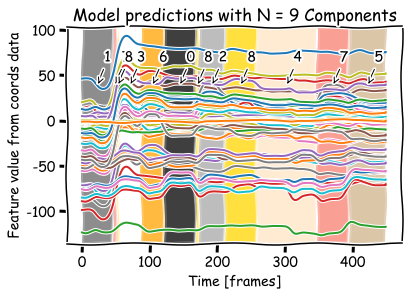

In [11]:
plot_prediction(coords, gmm_pred)

## Decision Trees

In [12]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(coords, hmm_pred)

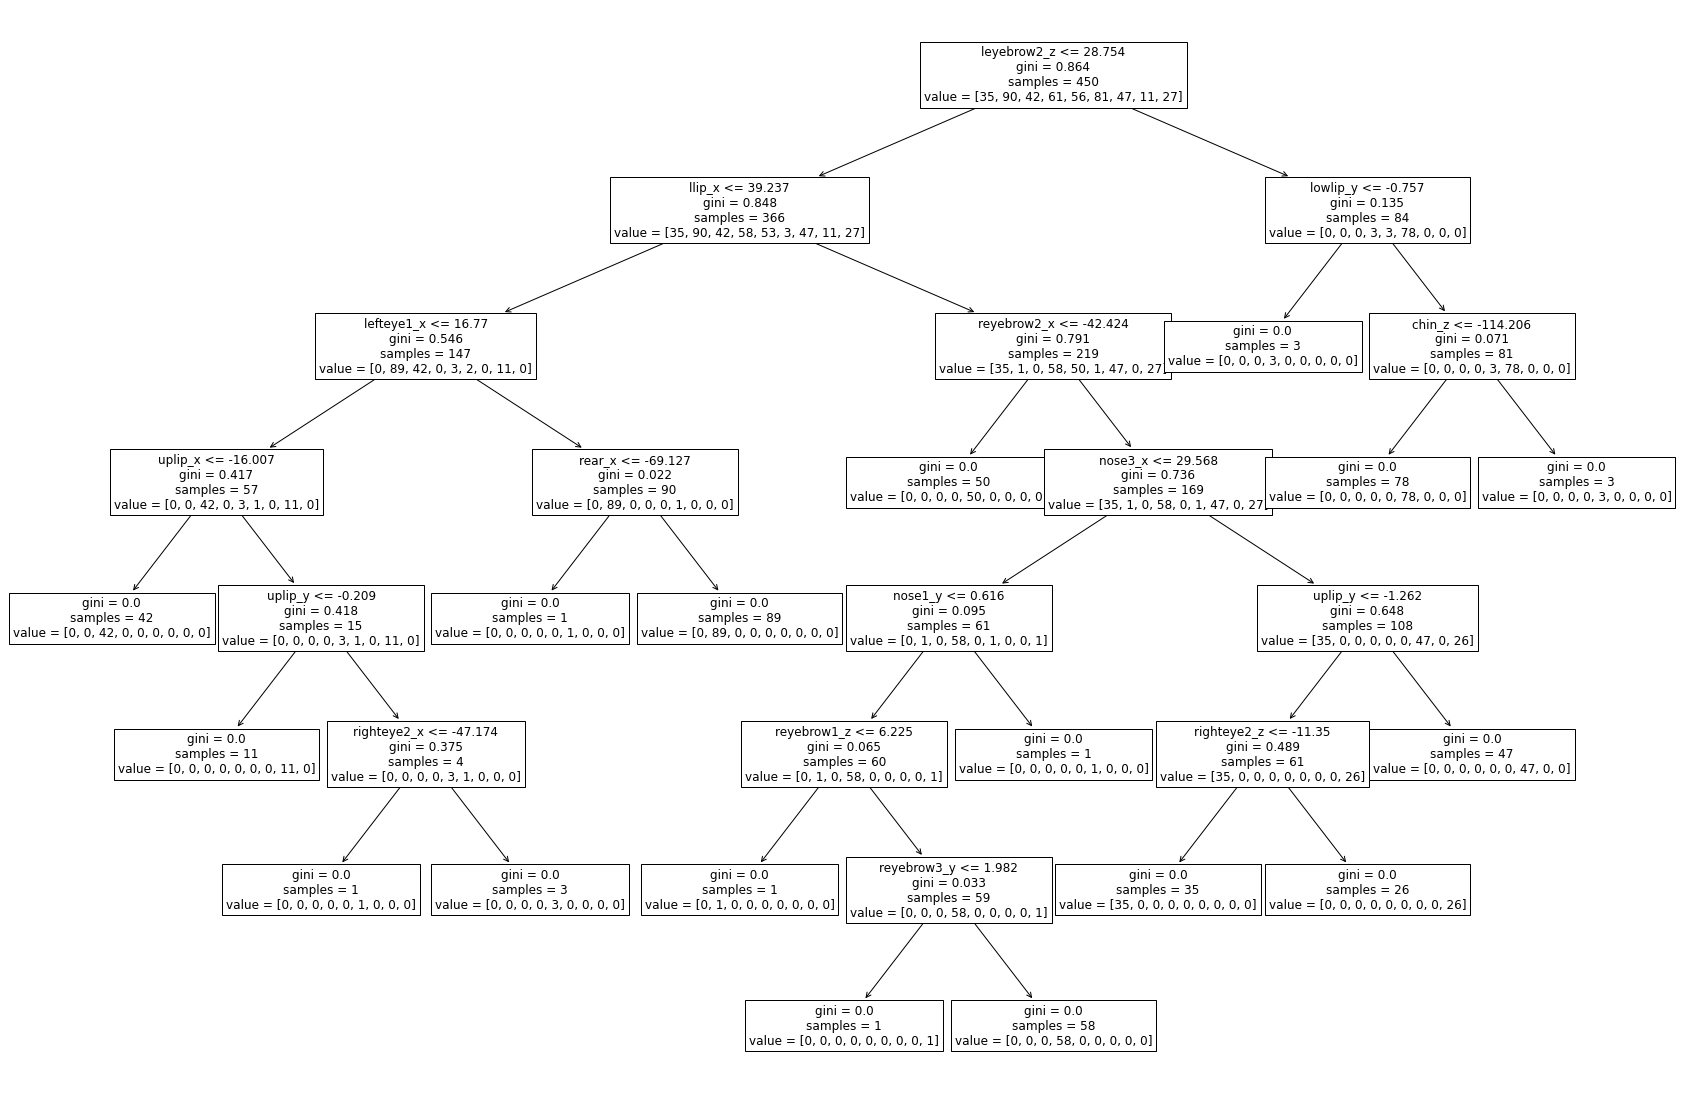

In [13]:
plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = coords.columns, fontsize=12)
plt.show()

In [14]:
n = 100
print(f'Prediction from decision tree for frame {n}: {dtree.predict(coords[n:n+1])}')

Prediction from decision tree for frame 100: [0]


## UMAP dimensionality reduction

In [15]:
mapper = umap.UMAP(metric = 'euclidean', n_neighbors=30, min_dist=0.99, random_state=42, init = 'random').fit_transform(coords)
print(f"Umap data ready with shape {np.shape(mapper)}")

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Umap data ready with shape (450, 2)


/var/folders/6b/833ys4917cs3g1g7jd7ynbm00000gn/T/ipykernel_16436/2460140279.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(umap1, umap2, c=labels.astype(np.float), cmap=cmap)


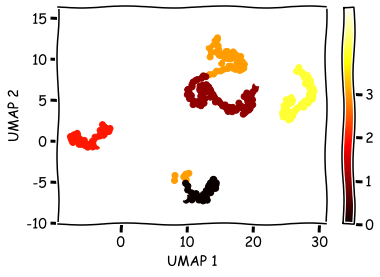

In [16]:
umap1 = mapper[:,0] 
umap2 = mapper[:,1]
labels = hmm_pred

with plt.xkcd():
    plt.figure()
    cmap = plt.cm.get_cmap('hot')
    plt.scatter(umap1, umap2, c=labels.astype(np.float), cmap=cmap)
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar(ticks=range(4))
    plt.clim(0, 5)
    plt.show()